<a href="https://colab.research.google.com/github/JulienJ-44/rakuteam/blob/main/11_bis_Vote_3_mod%C3%A8les_ypred_proba_text_0_82_img_0_55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Connection au google drive 
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [6]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import requests
import io

In [27]:
# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_RandomForest_Global_score0_74.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
y_pred_proba_rf = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_DnnText_score0_82.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
y_pred_proba_dnntext = pd.read_csv(io.StringIO(download.decode('utf-8')))


# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/y_train.csv"# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
y_train = pd.read_csv(io.StringIO(download.decode('utf-8')))


# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/y_test.csv"# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
y_test = pd.read_csv(io.StringIO(download.decode('utf-8')))


# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_Image_score_0_55_correct.csv"# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
y_pred_proba_img = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [28]:
y_test

,Unnamed: 0,prdtypecode
0,77312,2582
1,74413,10
2,33548,1320
3,59073,2583
4,25604,2583
...,...,...
16979,10968,2705
16980,11112,1920
16981,37626,2060
16982,21299,2583


In [29]:
# Remplacer les labels de 0 à 26

y_test = y_test.replace({'prdtypecode': {10: 1, 2280:2,   50:3, 1280:4, 2705:5, 2522:6, 2582:7, 1560:8, 1281:9, 1920:10, 2403:11,
       1140:12, 2583:13, 1180:14, 1300:15, 2462:16, 1160:17, 2060:18,   40:19,   60:20, 1320:21, 1302:22,
       2220:23, 2905:24, 2585:25, 1940:26, 1301:0}})

In [30]:
y_test

,Unnamed: 0,prdtypecode
0,77312,7
1,74413,1
2,33548,21
3,59073,13
4,25604,13
...,...,...
16979,10968,5
16980,11112,10
16981,37626,18
16982,21299,13


In [31]:
# moyenne des probas des deux modèles

y_pred_proba = y_pred_proba_rf + y_pred_proba_dnntext + y_pred_proba_img
y_pred_proba /= 3

In [32]:
# Drop le Unnamed
y_pred_proba = y_pred_proba.drop('Unnamed: 0', axis =1)
y_test = y_test.drop('Unnamed: 0', axis =1)

In [33]:
y_pred_proba.shape

(16984, 27)

In [34]:
y_test.shape

(16984, 1)

In [35]:
# Convertir Dataframe en array
y_pred_proba_arr = y_pred_proba.to_numpy()
y_test = y_test.to_numpy()

In [36]:
y_test

array([[ 7],
       [ 1],
       [21],
       ...,
       [18],
       [13],
       [13]], dtype=int64)

In [37]:
# on prend l'index de la proba la + élevée
# pour récupérer les classes

y_pred = y_pred_proba_arr.argmax(axis=1)
y_pred

array([ 7,  1, 21, ..., 18, 13, 13], dtype=int64)

In [38]:
y_test.shape

(16984, 1)

In [39]:
# Pour ajouter une dimension en plus
y_pred = np.reshape(y_pred, (-1, 1))


In [40]:
y_pred.shape

(16984, 1)

In [41]:
y_pred

array([[ 7],
       [ 1],
       [21],
       ...,
       [18],
       [13],
       [13]], dtype=int64)

In [ ]:
y_test = y_test.replace({'prdtypecode': {10: 1, 2280:2,   50:3, 1280:4, 2705:5, 2522:6, 2582:7, 1560:8, 1281:9, 1920:10, 2403:11,
       1140:12, 2583:13, 1180:14, 1300:15, 2462:16, 1160:17, 2060:18,   40:19,   60:20, 1320:21, 1302:22,
       2220:23, 2905:24, 2585:25, 1940:26, 1301:0}})

In [42]:
# Crosstab avec ravel pr enlever dimension et eviter message d'erreur (Error: If using all scalar values, you must pass an index)
dfcross = pd.crosstab(y_test.ravel(), y_pred.ravel(), rownames=['Classe réelle'], colnames=['Classe prédite'], normalize= 0)

In [113]:
dfcross = dfcross.sort_index(axis=0)
dfcross = dfcross.sort_index(axis=1)

In [121]:
tab_designation = {}

tab_code_designation = {'prdtypecode':
                                  (2583,1560,1300,2060,2522,1280,2403,2280,1920,1160,
                                  1320,10,2705,1140,2582,40,2585,1302,1281,50,2462,2905,
                                  60,2220,1301,1940,1180),
                    'désignation':('PISCINE & ACCESSOIRES',
                                  'MAISON: cusine, mobiliers',
                                  'JOUETS RADIO COMMANDES',               
                                  'LUMINAIRES, DECO',
                                  'FOURNITURE de BUREAU',
                                  'JOUETS ENFANTS',
                                  'LIVRES & MAGASINES: histoire, musées',
                                  "REVUES d'ARTS et SPECTACLES",
                                  "LITERIE, TEXTILE MAISON",
                                  "CARTES à COLLECTIONNER",
                                  "ACCESSOIRES BEBES",
                                  "LITTERATURE/ROMANS (occasions?)",
                                  "ROMAN: livre histoire?",
                                  "FIGURINES MANGAS",
                                  "MOBILIER & ACCESSOIRES extérieur",
                                  "JEUX VIDEOS (import?)",
                                  "OUTILS JARDINS",
                                  "LOISIRS/EQUIPEMENT extérieur",
                                  "JEUX EDUCATIFS ENFANTS",
                                  "ACCESSOIRES CONSOLES de JEUX",
                                  "JEUX VIDEOS OCCASIONS",
                                  "JEUX PC",
                                  "CONSOLES de JEUX",
                                  "ACCESSOIRES ANIMAUX",
                                  "VETEMENTS ENFANTS/BEBE",
                                  "ALIMENTATIONS, CONFISERIES, CAFE",
                                  "JEUX DE GUERRE sur TABLE")}

df_code_designation = pd.DataFrame(tab_code_designation)

df_code_designation = df_code_designation.sort_values('prdtypecode')
# df_code_designation.head(27)

In [118]:
dfcross.columns = df_code_designation['désignation']
dfcross.index = df_code_designation['désignation']

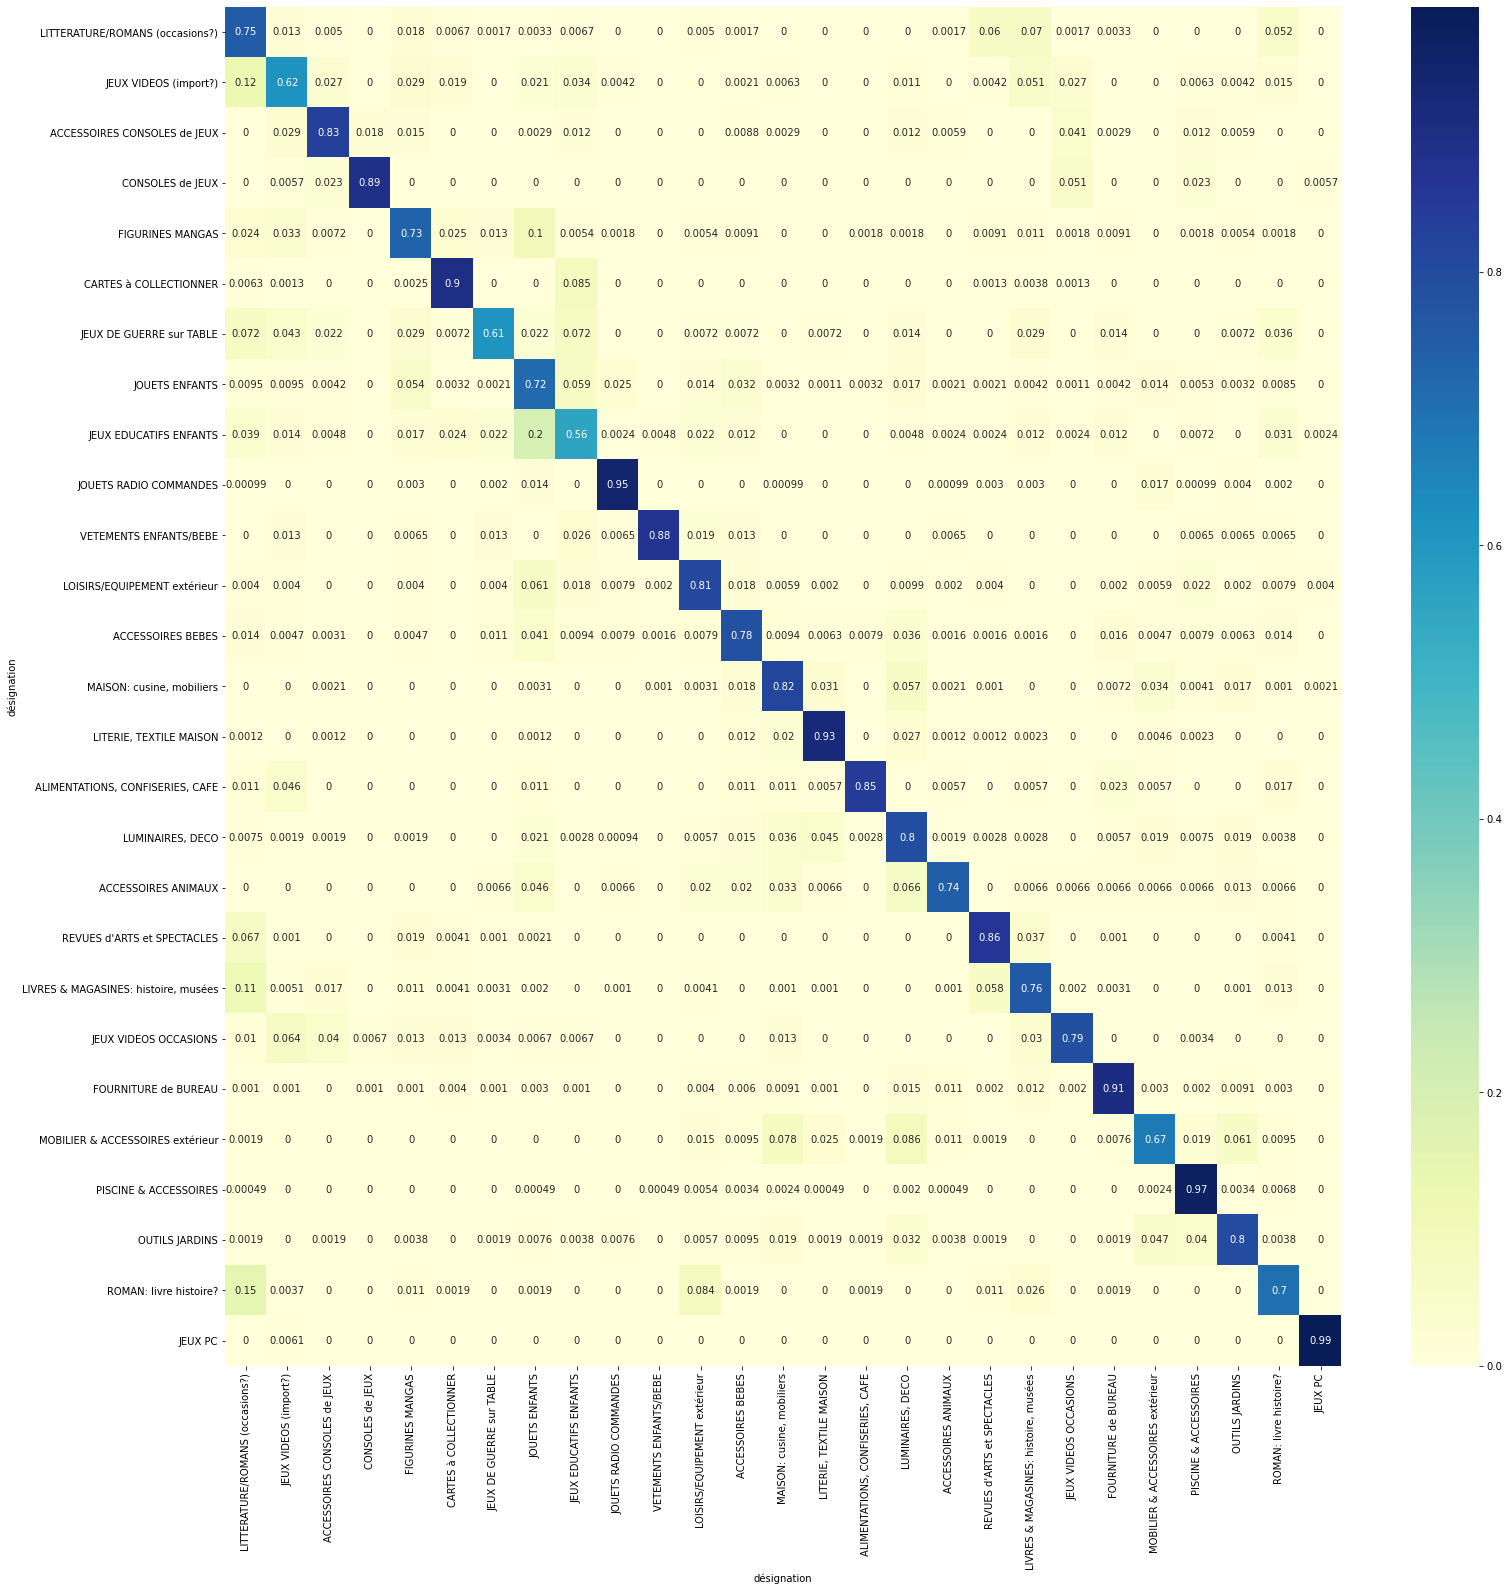

In [122]:
import seaborn as sns
# Matrice de confusion
plt.figure(figsize=(25,25))
g = sns.heatmap(dfcross,  annot=True, cmap="YlGnBu");
plt.xticks(rotation=90);

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.ravel(), y_pred.ravel())


0.8243052284503062

In [45]:
# PONDERATION des probabilités en fonction du score
# calcul des scores

score1_rf = 0.74
score2_dnntext = 0.82
score3_img = 0.55
print(score1_rf, score2_dnntext, score3_img)

0.74 0.82 0.55


In [46]:
# Drop la  colonne Unnamed: 0
y_pred_proba_rf = y_pred_proba_rf.drop('Unnamed: 0', axis =1)
y_pred_proba_dnntext = y_pred_proba_dnntext.drop('Unnamed: 0', axis =1)
y_pred_proba_img = y_pred_proba_img.drop('Unnamed: 0', axis =1)

In [47]:
# Convertir Dataframe en array
y_pred_proba_rf = y_pred_proba_rf.to_numpy()
y_pred_proba_dnntext = y_pred_proba_dnntext.to_numpy()
y_pred_proba_img = y_pred_proba_img.to_numpy()

In [48]:
# nouveau calcul des probas pondérées
y_pred_proba_weighted = (score1_rf * y_pred_proba_rf + score2_dnntext * y_pred_proba_dnntext + score3_img * y_pred_proba_img) / (score1_rf + score2_dnntext + score3_img)

y_pred_weighted = y_pred_proba_weighted.argmax(axis=1)


In [49]:
# Pour ajouter une dimension en plus
y_pred_weighted = np.reshape(y_pred_weighted, (-1, 1))

In [50]:
# Crosstab avec ravel pr enlever dimension et eviter message d'erreur (Error: If using all scalar values, you must pass an index)
dfcross2 = pd.crosstab(y_test.ravel(), y_pred_weighted.ravel(), normalize= 0)

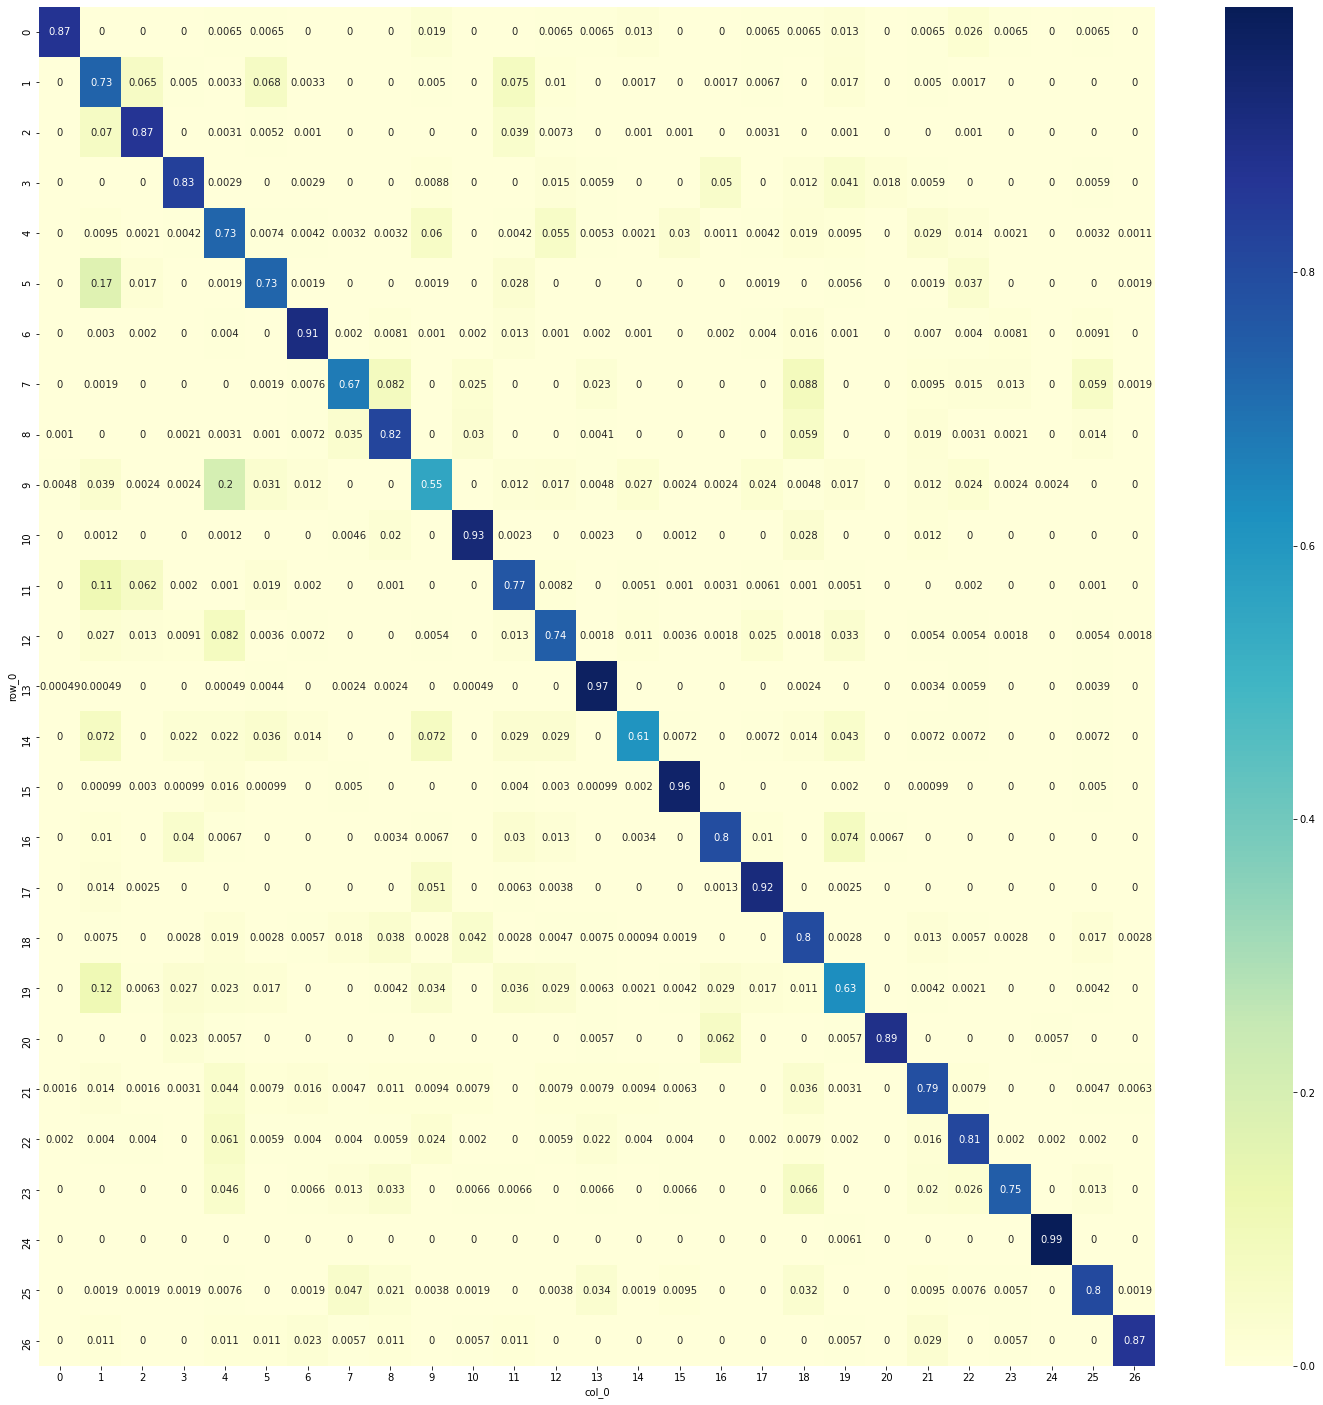

In [51]:
import seaborn as sns
# Matrice de confusion
plt.figure(figsize=(25,25))
sns.heatmap(dfcross2,  annot=True, cmap="YlGnBu");

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.ravel(), y_pred_weighted.ravel())

0.8290155440414507

In [53]:
from sklearn import metrics


print("Précision de la prédiction:", metrics.accuracy_score(y_test, y_pred_weighted)*100, '%')

print("Evaluation détaillée de la Classification par RDF :\n \n" ,
      (metrics.classification_report(y_test, y_pred_weighted)))

Précision de la prédiction: 82.90155440414507 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       154
           1       0.51      0.73      0.60       601
           2       0.86      0.87      0.86       964
           3       0.84      0.83      0.83       341
           4       0.72      0.73      0.72       944
           5       0.76      0.73      0.74       536
           6       0.94      0.91      0.92       993
           7       0.77      0.67      0.72       524
           8       0.84      0.82      0.83       967
           9       0.59      0.55      0.57       415
          10       0.89      0.93      0.91       866
          11       0.81      0.77      0.79       979
          12       0.76      0.74      0.75       552
          13       0.96      0.97      0.97      2045
          14       0.66      0.61      0.64       139
          15       0.95      0.9